<a href="https://colab.research.google.com/github/dlsnfl03/Image-Analysis-U-net-/blob/visualization/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-addons


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 5.1 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model
from google.colab import drive

# Google Drive 마운트
drive.mount('/content/drive')

# 저장된 모델 경로
model_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5'

# 모델 불러오기
with tf.keras.utils.custom_object_scope({'AdamW': tfa.optimizers.AdamW}):
    model = load_model(model_path)

# 모델 정보 확인
model.summary()


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Mounted at /content/drive
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 128, 128, 3)]        0         []                            
                                                                                                  
 conv2d_19 (Conv2D)          (None, 128, 128, 64)         1792      ['input_2[0][0]']             
                                                                                                  
 conv2d_20 (Conv2D)          (None, 128, 128, 64)         36928     ['conv2d_19[0][0]']           
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 64, 64, 64)           0         ['conv2d_20[0][0]']           
 g2D)                                                             

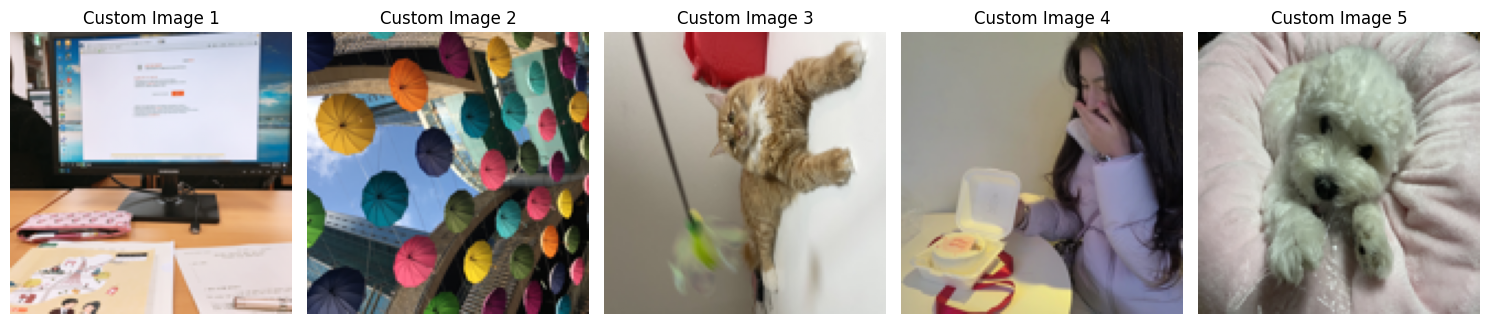

1/1 [==============================] - 3s 3s/step


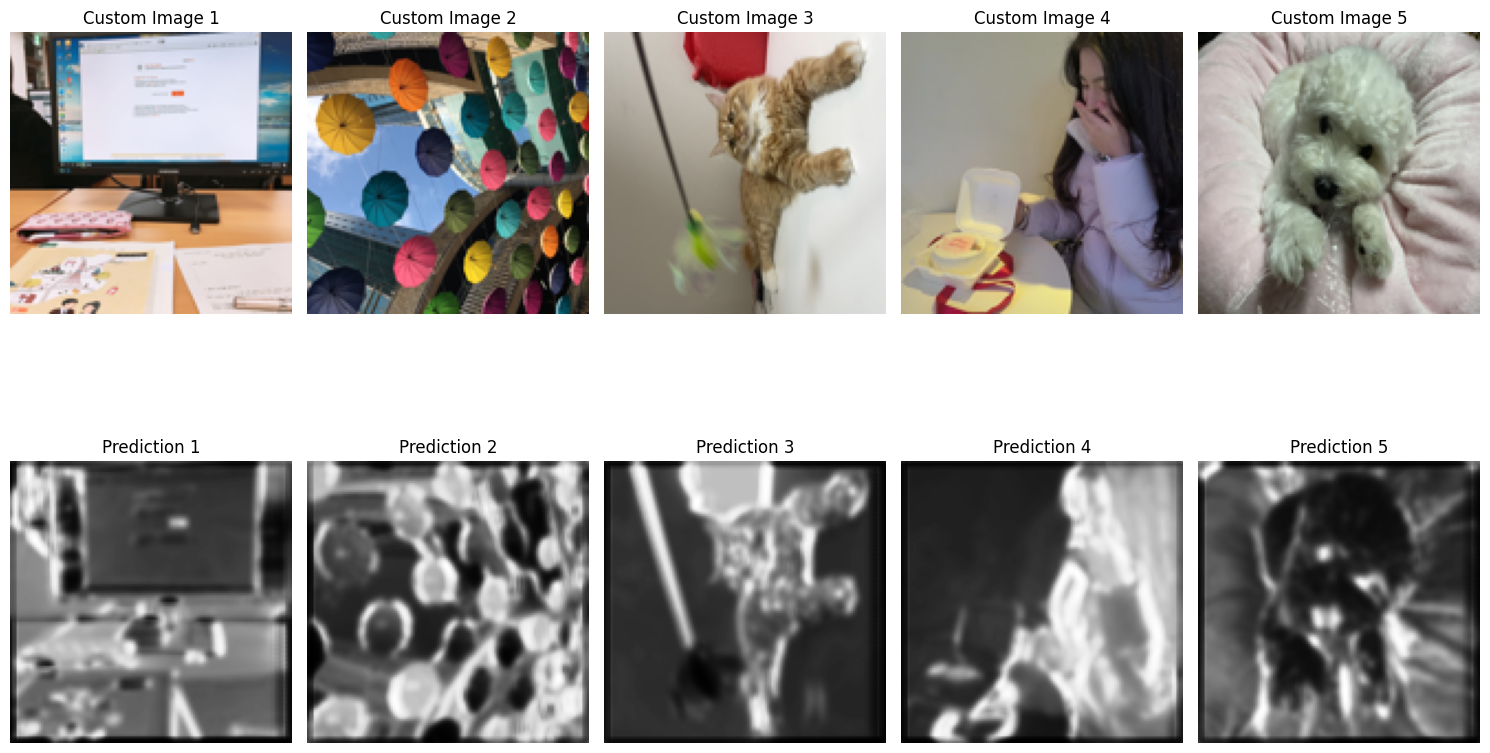

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# CustomDataGenerator 수정
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 불러온 모델을 사용하여 커스텀 이미지 예측
predictions = model.predict(custom_images)

# 예측 결과 시각화
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')

        axs[1, i].imshow(prediction, cmap='gray')
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')
    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(custom_images, predictions)


'/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')

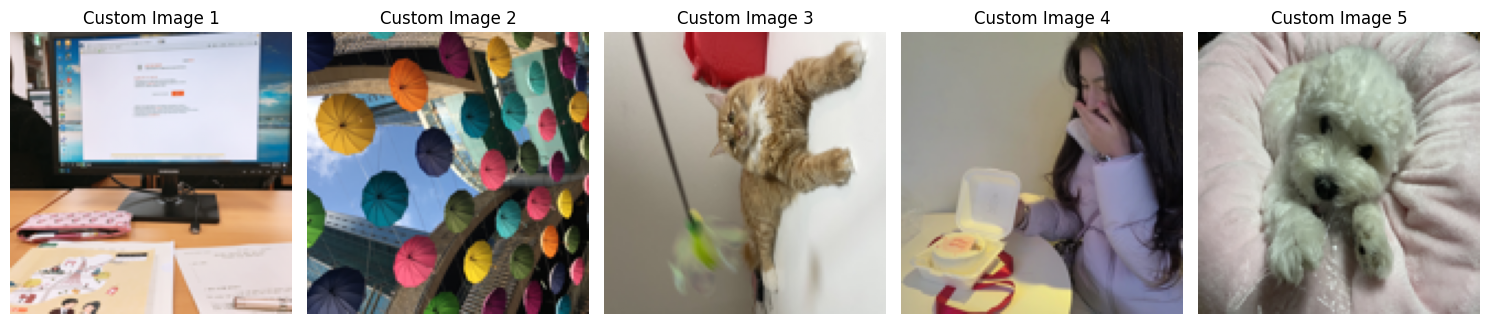

1/1 [==============================] - 8s 8s/step


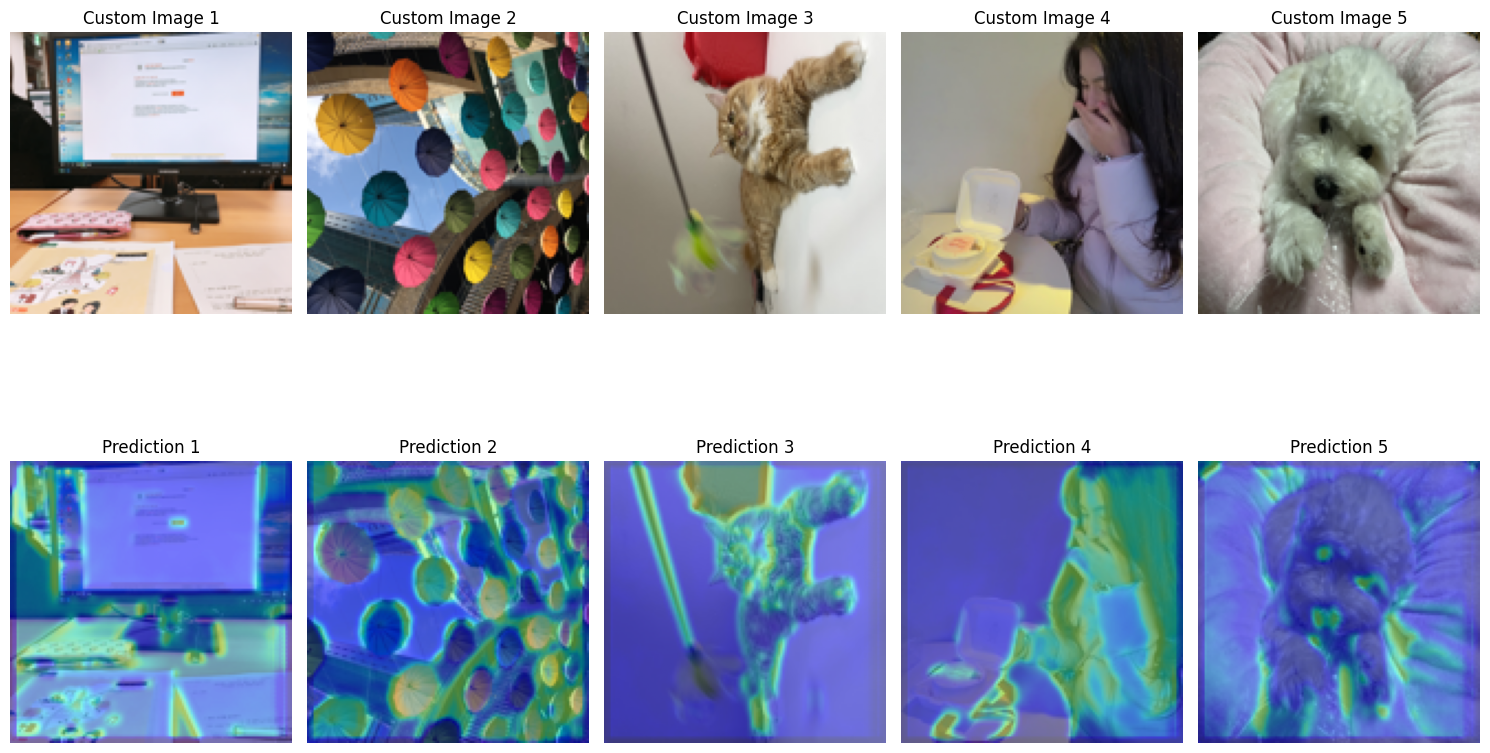

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# CustomDataGenerator 수정
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 불러온 모델을 사용하여 커스텀 이미지 예측
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')
predictions = model.predict(custom_images)

# 예측 결과 시각화
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')

        # three channels for RGB visualization
        if prediction.shape[-1] == 1:
            prediction = np.repeat(prediction, 3, axis=-1)

        # 원본 / 예측 블랜딩
        prediction_color = np.zeros_like(image)
        alpha = 0.5

        # 예측 컬러맵
        prediction_cmap = plt.cm.jet(prediction[..., 0])
        prediction_cmap = np.delete(prediction_cmap, 3, 2)  # remove the alpha channel

        prediction_color = (alpha * prediction_cmap[..., :3] + (1 - alpha) * image)

        axs[1, i].imshow(prediction_color)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')
    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(custom_images, predictions)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# CustomDataGenerator 수정
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 불러온 모델을 사용하여 커스텀 이미지 예측
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')
predictions = model.predict(custom_images)

# 클래스별로 색상을 다르게 하는 함수
def apply_colormap_to_prediction(prediction):
    unique_classes = np.unique(prediction)
    num_classes = len(unique_classes)
    colormap = plt.cm.get_cmap('jet', num_classes)

    # 컬러맵 적용을 위해 고유한 클래스 값을 0에서 num_classes-1로 매핑
    mapped_prediction = np.zeros_like(prediction[..., 0])
    for i, cls in enumerate(unique_classes):
        mapped_prediction[prediction[..., 0] == cls] = i

    colored_prediction = colormap(mapped_prediction / (num_classes - 1))
    return colored_prediction[..., :3]  # Remove alpha channel

# 예측 결과 시각화
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')

        # three channels for RGB visualization
        if prediction.shape[-1] == 1:
            prediction_colormap = apply_colormap_to_prediction(prediction)

        # 원본 / 예측 블랜딩
        alpha = 0.5
        blended_image = (alpha * prediction_colormap + (1 - alpha) * image)

        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')
    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(custom_images, predictions)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import cv2

# CustomDataGenerator 수정
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 불러온 모델을 사용하여 커스텀 이미지 예측
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')
predictions = model.predict(custom_images)

# 클래스별로 색상을 다르게 하는 함수
def apply_colormap_to_prediction(prediction):
    unique_classes = np.unique(prediction)
    num_classes = len(unique_classes)
    colormap = plt.cm.get_cmap('jet', num_classes)

    # 컬러맵 적용을 위해 고유한 클래스 값을 0에서 num_classes-1로 매핑
    mapped_prediction = np.zeros_like(prediction[..., 0])
    for i, cls in enumerate(unique_classes):
        mapped_prediction[prediction[..., 0] == cls] = i

    colored_prediction = colormap(mapped_prediction / (num_classes - 1))
    return colored_prediction[..., :3]  # Remove alpha channel

# 밝기 조정 함수
def adjust_brightness(image, mask, factor=1.5):
    image_uint8 = (image * 255).astype(np.uint8)
    hsv = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv)
    v = cv2.add(v, int(255 * (factor - 1)))
    v = np.clip(v, 0, 255)
    final_hsv = cv2.merge((h, s, v))
    brightened_image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)
    return brightened_image / 255.0

# 배경 블러 처리 함수
def apply_blur_to_background(image, mask, ksize=(15, 15)):
    image_uint8 = (image * 255).astype(np.uint8)
    mask_uint8 = (mask * 255).astype(np.uint8)
    mask_uint8 = cv2.cvtColor(mask_uint8, cv2.COLOR_GRAY2BGR)

    # 배경 블러 적용
    blurred_image = cv2.GaussianBlur(image_uint8, ksize, 0)

    # 객체 영역 유지
    background_blurred = np.where(mask_uint8 == 0, blurred_image, image_uint8)

    return background_blurred / 255.0

# 예측 결과 시각화
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(4, num_images, figsize=(15, 20))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')

        if prediction.shape[-1] == 1:
            prediction_colormap = apply_colormap_to_prediction(prediction)

        # 밝기 조정
        brightened_image = adjust_brightness(image, prediction)

        # 배경 블러 처리
        blurred_background_image = apply_blur_to_background(image, prediction)

        # 원본 / 예측 블랜딩
        alpha = 0.5
        blended_image = (alpha * prediction_colormap + (1 - alpha) * image)

        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')

        axs[2, i].imshow(brightened_image)
        axs[2, i].axis('off')
        axs[2, i].set_title(f'Brightened {i+1}')

        axs[3, i].imshow(blurred_background_image)
        axs[3, i].axis('off')
        axs[3, i].set_title(f'Blurred Background {i+1}')

    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(custom_images, predictions)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# CustomDataGenerator 수정
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]

        batch_images = []
        batch_masks = []

        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')

            image = Image.open(image_path)
            mask = Image.open(mask_path)

            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")

            image = image.resize((128, 128))
            mask = mask.resize((128, 128))

            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)

            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0

                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)

        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 불러온 모델을 사용하여 커스텀 이미지 예측
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')
predictions = model.predict(custom_images)

# 클래스별로 색상을 다르게 하는 함수
def apply_colormap_to_prediction(prediction):
    unique_classes = np.unique(prediction).astype(np.int32)
    num_classes = len(unique_classes)
    colormap = plt.cm.get_cmap('jet', num_classes)

    # 컬러맵 적용을 위해 고유한 클래스 값을 0에서 num_classes-1로 매핑
    mapped_prediction = np.zeros_like(prediction[..., 0], dtype=np.int32)
    for i, cls in enumerate(unique_classes):
        mapped_prediction[prediction[..., 0] == cls] = i

    colored_prediction = colormap(mapped_prediction / (num_classes - 1))
    return colored_prediction[..., :3]  # Remove alpha channel

# 배경을 검은색으로 처리하는 함수
def apply_black_background(image, mask):
    mask_uint8 = (mask * 255).astype(np.uint8)
    mask_bool = mask_uint8[..., 0] > 127  # 마스크를 이진화

    black_background_image = np.zeros_like(image)
    black_background_image[mask_bool] = image[mask_bool]

    return black_background_image

# 예측 결과 시각화
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(3, num_images, figsize=(15, 15))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')

        if prediction.shape[-1] == 1:
            prediction_colormap = apply_colormap_to_prediction(prediction)

        # 특정 인덱스(3, 4, 5)에 대해 배경을 검은색으로 처리
        if i in [2, 3, 4]:  # 인덱스는 0부터 시작하므로 3, 4, 5는 2, 3, 4에 해당
            black_background_image = apply_black_background(image, prediction)
        else:
            black_background_image = image  # 배경을 검은색으로 처리하지 않음

        # 원본 / 예측 블랜딩
        alpha = 0.5
        blended_image = (alpha * prediction_colormap + (1 - alpha) * image)

        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')

        axs[2, i].imshow(black_background_image)
        axs[2, i].axis('off')
        axs[2, i].set_title(f'Black Background {i+1}' if i in [2, 3, 4] else f'Original {i+1}')

    plt.tight_layout()
    plt.show()

# 예측 결과 시각화
visualize_predictions(custom_images, predictions)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

# CustomDataGenerator 클래스 정의
class CustomDataGenerator(keras.utils.Sequence):
    def __init__(self, images_path, masks_path, batch_size):
        self.images_path = images_path
        self.masks_path = masks_path
        self.batch_size = batch_size
        self.image_filenames = self.get_matching_filenames()
        self.mask_filenames = self.get_matching_filenames()

    def get_matching_filenames(self):
        image_files = set([os.path.splitext(filename)[0] for filename in os.listdir(self.images_path)])
        mask_files = set([os.path.splitext(filename[len('train2017_'):])[0] for filename in os.listdir(self.masks_path)])
        matching_files = list(image_files.intersection(mask_files))
        return matching_files

    def __len__(self):
        return int(np.ceil(len(self.image_filenames) / self.batch_size))

    def __getitem__(self, idx):
        batch_filenames = self.image_filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = []
        batch_masks = []
        for filename in batch_filenames:
            image_path = os.path.join(self.images_path, filename + '.jpg')
            mask_path = os.path.join(self.masks_path, 'train2017_' + filename + '.jpg')
            image = Image.open(image_path)
            mask = Image.open(mask_path)
            if image.size != mask.size:
                raise ValueError(f"Incompatible dimensions for image {image_path} and mask {mask_path}")
            image = image.resize((128, 128))
            mask = mask.resize((128, 128))
            preprocessed_image = np.array(image)
            preprocessed_mask = np.array(mask)
            if len(preprocessed_image.shape) == 3 and preprocessed_image.shape == (128, 128, 3):
                preprocessed_image = preprocessed_image / 255.0
                preprocessed_mask = preprocessed_mask / 255.0
                batch_images.append(preprocessed_image)
                batch_masks.append(preprocessed_mask)
        return np.array(batch_images), np.array(batch_masks)

# Custom 이미지 전처리 함수
def process_custom_images(custom_image_paths):
    images = []
    for image_path in custom_image_paths:
        image = Image.open(image_path).convert('RGB')
        image = image.resize((128, 128))
        preprocessed_image = np.array(image) / 255.0
        images.append(preprocessed_image)
    return np.array(images)

# Custom 이미지 시각화 함수
def visualize_custom_images(custom_images):
    num_images = len(custom_images)
    fig, axs = plt.subplots(1, num_images, figsize=(15, 5))
    for i, image in enumerate(custom_images):
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(f'Custom Image {i+1}')
    plt.tight_layout()
    plt.show()

# 경로 설정
custom_images_path = '/content/drive/MyDrive/Colab Notebooks/데기인/팀플/custom'
custom_image_names = ['custom_1.jpg', 'custom_2.jpg', 'custom_3.jpg', 'custom_4.jpg', 'custom_5.jpg']
custom_image_paths = [os.path.join(custom_images_path, name) for name in custom_image_names]

# Custom 이미지 전처리
custom_images = process_custom_images(custom_image_paths)

# Custom 이미지 시각화
visualize_custom_images(custom_images)

# 모델 불러오기
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/데기인/팀플/unet/AdamW_final_model.h5')
predictions = model.predict(custom_images)

# 클래스별로 색상을 다르게 하는 함수
def apply_colormap_to_prediction(prediction):
    unique_classes = np.unique(prediction)
    num_classes = len(unique_classes)
    colormap = plt.cm.get_cmap('jet', num_classes)
    mapped_prediction = np.zeros_like(prediction[..., 0])
    for i, cls in enumerate(unique_classes):
        mapped_prediction[prediction[..., 0] == cls] = i
    colored_prediction = colormap(mapped_prediction / (num_classes - 1))
    return colored_prediction[..., :3]  # Remove alpha channel

# 특정 클래스를 강조하는 함수
def emphasize_class(predictions, target_class, factor=1.5):
    emphasized_predictions = predictions.copy()
    emphasized_predictions[predictions == target_class] *= factor
    return np.clip(emphasized_predictions, 0, 1)

# 특정 클래스의 색상을 변경하는 함수
def change_class_color(predictions, target_class, new_color):
    colored_predictions = np.zeros((*predictions.shape, 3))
    for i in range(predictions.shape[0]):
        for j in range(predictions.shape[1]):
            for k in range(predictions.shape[2]):
                if predictions[i, j, k] == target_class:
                    colored_predictions[i, j, k] = new_color
                else:
                    colored_predictions[i, j, k] = predictions[i, j, k]
    return colored_predictions

# 예측 결과와 원본 이미지를 블렌딩하는 함수
def blend_images_with_predictions(custom_images, predictions, alpha=0.5):
    blended_images = []
    for image, prediction in zip(custom_images, predictions):
        if prediction.shape[-1] == 1:
            prediction_colormap = apply_colormap_to_prediction(prediction)
        blended_image = (alpha * prediction_colormap + (1 - alpha) * image)
        blended_images.append(blended_image)
    return blended_images

# 다양한 컬러맵을 적용하는 함수
def apply_custom_colormap_to_prediction(prediction, colormap_name):
    unique_classes = np.unique(prediction)
    num_classes = len(unique_classes)
    colormap = plt.cm.get_cmap(colormap_name, num_classes)
    mapped_prediction = np.zeros_like(prediction[..., 0])
    for i, cls in enumerate(unique_classes):
        mapped_prediction[prediction[..., 0] == cls] = i
    colored_prediction = colormap(mapped_prediction / (num_classes - 1))
    return colored_prediction[..., :3]  # Remove alpha channel

# 예측 결과 시각화 함수
def visualize_predictions(custom_images, predictions):
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')
        if prediction.shape[-1] == 1:
            prediction_colormap = apply_colormap_to_prediction(prediction)
        blended_image = (0.5 * prediction_colormap + 0.5 * image)
        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction {i+1}')
    plt.tight_layout()
    plt.show()

# 특정 클래스 강조 시각화 함수
def visualize_emphasized_predictions(custom_images, predictions, target_class):
    emphasized_predictions = [emphasize_class(pred, target_class) for pred in predictions]
    visualize_predictions(custom_images, emphasized_predictions)

# 특정 클래스 색상 변경 시각화 함수
def visualize_colored_class_predictions(custom_images, predictions, target_class, new_color):
    colored_predictions = [change_class_color(pred, target_class, new_color) for pred in predictions]
    visualize_predictions(custom_images, colored_predictions)

# 블렌딩 결과 시각화 함수
def visualize_blended_predictions(custom_images, predictions, alpha=0.5):
    blended_images = blend_images_with_predictions(custom_images, predictions, alpha)
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, blended_image) in enumerate(zip(custom_images, blended_images)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')
        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Blended Prediction {i+1}')
    plt.tight_layout()
    plt.show()

# 다양한 컬러맵 적용 시각화 함수
def visualize_custom_colormap_predictions(custom_images, predictions, colormap_name):
    num_images = len(custom_images)
    fig, axs = plt.subplots(2, num_images, figsize=(15, 10))
    for i, (image, prediction) in enumerate(zip(custom_images, predictions)):
        axs[0, i].imshow(image)
        axs[0, i].axis('off')
        axs[0, i].set_title(f'Custom Image {i+1}')
        if prediction.shape[-1] == 1:
            prediction_colormap = apply_custom_colormap_to_prediction(prediction, colormap_name)
        blended_image = (0.5 * prediction_colormap + 0.5 * image)
        axs[1, i].imshow(blended_image)
        axs[1, i].axis('off')
        axs[1, i].set_title(f'Prediction with {colormap_name} {i+1}')
    plt.tight_layout()
    plt.show()

# 특정 클래스 강조 (예: 클래스 1)
target_class = 1
visualize_emphasized_predictions(custom_images, predictions, target_class)

# 특정 클래스 색상 변경 (예: 빨강색)
new_color = [1, 0, 0]  # 빨강색
visualize_colored_class_predictions(custom_images, predictions, target_class, new_color)

# 예측 결과와 원본 이미지 블렌딩
alpha = 0.5
visualize_blended_predictions(custom_images, predictions, alpha)

# 다양한 컬러맵 적용 (예: 'viridis' 컬러맵)
colormap_name = 'viridis'
visualize_custom_colormap_predictions(custom_images, predictions, colormap_name)
